## Predicting Bicycle Trip Duration Based on Weather Conditions, Route, and Season

#### This project focuses on building a predictive model for estimating the duration of a bicycle trip based on various environmental and trip-related features.

For this project, we use the [Bergen Bike Sharing Dataset (2023)](https://www.kaggle.com/datasets/amykzhang/bergen-bike-sharing-dataset-2023).

## Part I - Dataset Analysys

### Importing libraries

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests

### Importing Data

In [11]:
trip_data = pd.read_csv('bergen_merged.csv')

trip_data.head()

start_time             end_time  duration  start_station_id  \
0  2023-01-01 04:00:00  2023-01-01 04:00:00       629               150   
1  2023-01-01 04:00:00  2023-01-01 04:00:00       107              1894   
2  2023-01-01 04:00:00  2023-01-01 04:00:00       643              1894   
3  2023-01-01 05:00:00  2023-01-01 05:00:00       227               797   
4  2023-01-01 05:00:00  2023-01-01 06:00:00       254                22   

  start_station_name  start_station_latitude  start_station_longitude  \
0             Torget               60.395878                 5.325284   
1   Kong Oscars gate               60.393323                 5.330654   
2   Kong Oscars gate               60.393323                 5.330654   
3   John Lunds plass               60.388247                 5.324558   
4            Skur 11               60.396384                 5.324169   

   end_station_id     end_station_name  end_station_latitude  \
0            1896  Takhagen på Nordnes             60.398865   
1            1894     Kong Oscars gate             60.393323   
2             809      Skutevikstorget             60.402229   
3              22              Skur 11             60.396384   
4             812     Hans Hauges gate             60.401906   

   end_station_longitude  precipitation  temperature  wind_speed  weather  \
0               5.306411            0.0         -1.8         1.7        1   
1               5.330654            0.0         -1.8         1.7        1   
2               5.320745            0.0         -1.8         1.7        1   
3               5.324169            0.0         -1.9         4.3        1   
4               5.324748            0.0         -1.9         4.3        1   

   sunshine  season  is_holiday  is_weekend  
0         0       3        True        True  
1         0       3        True        True  
2         0       3        True        True  
3         0       3        True        True  
4         0       3        True        True

### Displaying Information About the Data

In [12]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467861 entries, 0 to 467860
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_time               467861 non-null  object 
 1   end_time                 467861 non-null  object 
 2   duration                 467861 non-null  int64  
 3   start_station_id         467861 non-null  int64  
 4   start_station_name       467861 non-null  object 
 5   start_station_latitude   467861 non-null  float64
 6   start_station_longitude  467861 non-null  float64
 7   end_station_id           467861 non-null  int64  
 8   end_station_name         467861 non-null  object 
 9   end_station_latitude     467861 non-null  float64
 10  end_station_longitude    467861 non-null  float64
 11  precipitation            467861 non-null  float64
 12  temperature              467861 non-null  float64
 13  wind_speed               467861 non-null  float64
 14  weat

In [13]:
trip_data.describe()

duration  start_station_id  start_station_latitude  \
count  467861.000000     467861.000000           467861.000000   
mean      616.487762        690.826818               60.388019   
std       617.687964        743.300261                0.009843   
min        61.000000          3.000000               60.341031   
25%       308.000000        138.000000               60.381750   
50%       467.000000        641.000000               60.388910   
75%       701.000000        814.000000               60.393977   
max     61557.000000       3724.000000               60.423343   

       start_station_longitude  end_station_id  end_station_latitude  \
count            467861.000000   467861.000000         467861.000000   
mean                  5.327097      686.333246             60.388327   
std                   0.012707      735.209423              0.009473   
min                   5.273174        3.000000             60.341031   
25%                   5.320185      138.000000             60.382255   
50%                   5.325714      640.000000             60.389626   
75%                   5.333327      814.000000             60.394550   
max                   5.361202     3724.000000             60.423343   

       end_station_longitude  precipitation    temperature     wind_speed  \
count          467861.000000  467861.000000  467861.000000  467861.000000   
mean                5.326820       0.171838      10.790281       4.269218   
std                 0.012154       0.712090       6.529056       2.358821   
min                 5.273174       0.000000      -9.300000       0.300000   
25%                 5.320656       0.000000       5.900000       2.400000   
50%                 5.326041       0.000000      11.100000       4.000000   
75%                 5.333027       0.000000      15.800000       5.600000   
max                 5.361202      18.800000      27.100000      17.400000   

             weather       sunshine         season  
count  467861.000000  467861.000000  467861.000000  
mean        4.930334      21.800539       1.223579  
std         8.069464      26.209821       1.054577  
min         1.000000       0.000000       0.000000  
25%         2.000000       0.000000       0.000000  
50%         3.000000       1.000000       1.000000  
75%         4.000000      59.000000       2.000000  
max        49.000000      60.000000       3.000000

We can see that our dataset contains several features that will not be useful for training the model. These features are:
- start_time
- end_time
- start_station_id
- start_station_name
- end_station_id
- end_station_name

These features will be removed in the following steps.

The features representing coordinates can be used to calculate the trip distance and elevation difference. We also have features describing weather conditions, such as precipitation, temperature, wind speed, and sunlight, as well as features indicating the trip period (season, is_weekend, is_holiday).

### Deleting features which we don't need from the dataset

In [14]:
trip_data.drop(columns=['start_time', 'end_time', 'start_station_id', 'start_station_name',
                                    'end_station_id', 'end_station_name'], inplace=True)

trip_data.head()

duration  start_station_latitude  start_station_longitude  \
0       629               60.395878                 5.325284   
1       107               60.393323                 5.330654   
2       643               60.393323                 5.330654   
3       227               60.388247                 5.324558   
4       254               60.396384                 5.324169   

   end_station_latitude  end_station_longitude  precipitation  temperature  \
0             60.398865               5.306411            0.0         -1.8   
1             60.393323               5.330654            0.0         -1.8   
2             60.402229               5.320745            0.0         -1.8   
3             60.396384               5.324169            0.0         -1.9   
4             60.401906               5.324748            0.0         -1.9   

   wind_speed  weather  sunshine  season  is_holiday  is_weekend  
0         1.7        1         0       3        True        True  
1         1.7        1         0       3        True        True  
2         1.7        1         0       3        True        True  
3         4.3        1         0       3        True        True  
4         4.3        1         0       3        True        True

### Checking the Data Completeness

In [15]:
def calculate_null_percentage(df):
    null_counts = df.isnull().sum()
    total_counts = len(df)
    null_percentage = (null_counts / total_counts) * 100

    results = pd.DataFrame({
        'Null_Count': null_counts,
        'Null_Percentage': null_percentage
    })

    print("Percentage of missing data in the dataframe:")
    print(results)

calculate_null_percentage(trip_data)

Percentage of missing data in the dataframe:
                         Null_Count  Null_Percentage
duration                          0              0.0
start_station_latitude            0              0.0
start_station_longitude           0              0.0
end_station_latitude              0              0.0
end_station_longitude             0              0.0
precipitation                     0              0.0
temperature                       0              0.0
wind_speed                        0              0.0
weather                           0              0.0
sunshine                          0              0.0
season                            0              0.0
is_holiday                        0              0.0
is_weekend                        0              0.0


As can be seen, there are no missing data in our dataset.

### Analyzing Feature Variability

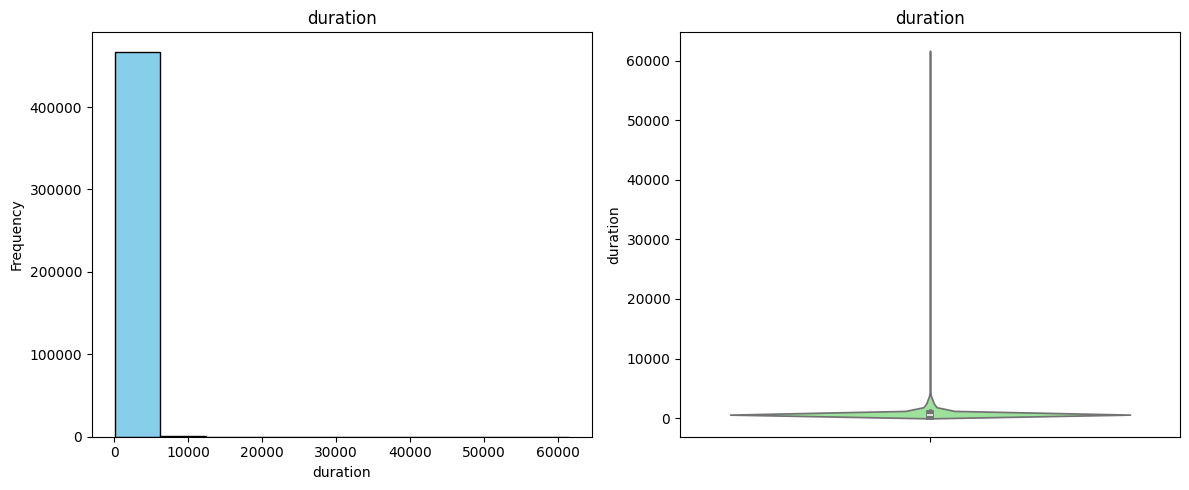

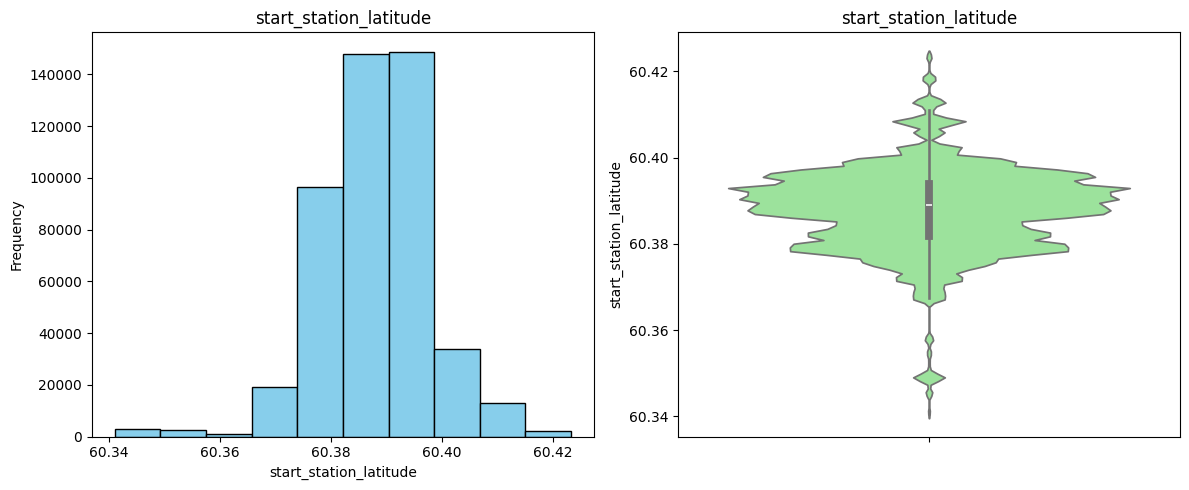

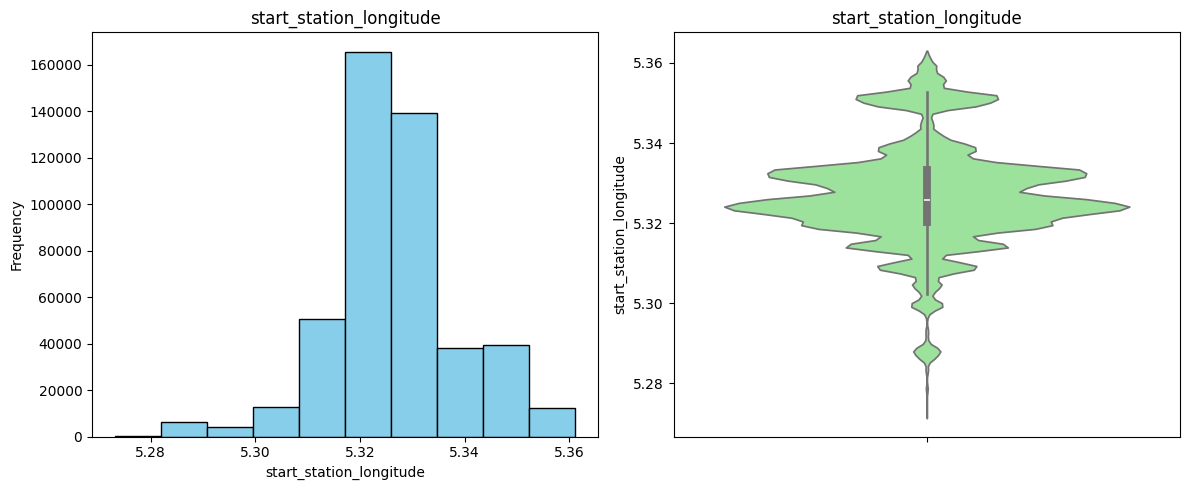

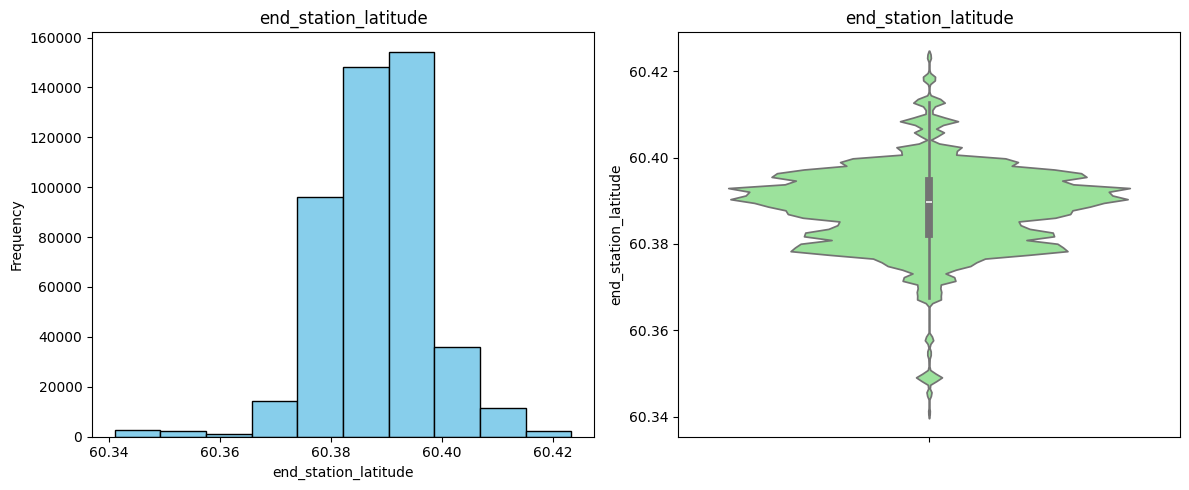

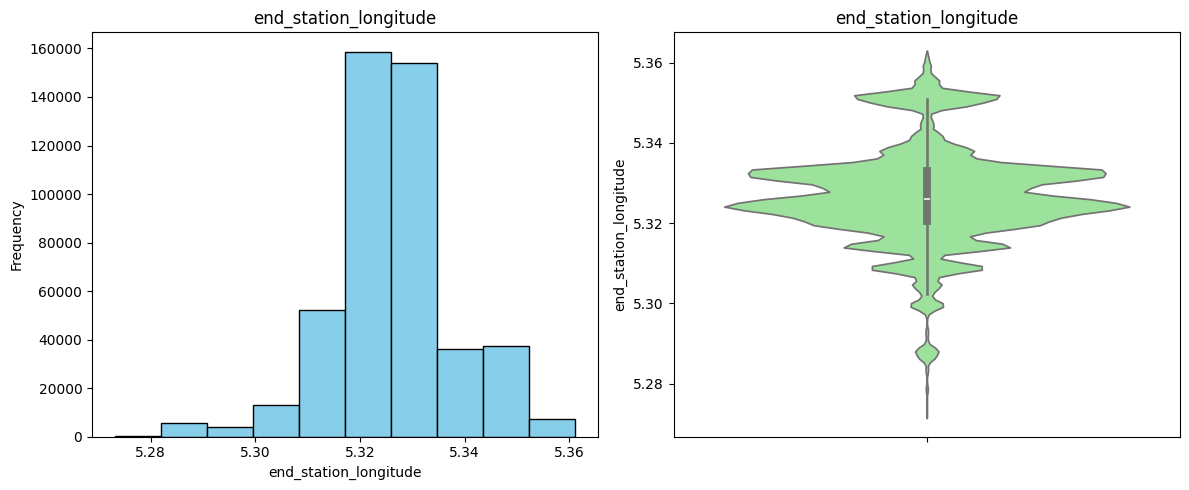

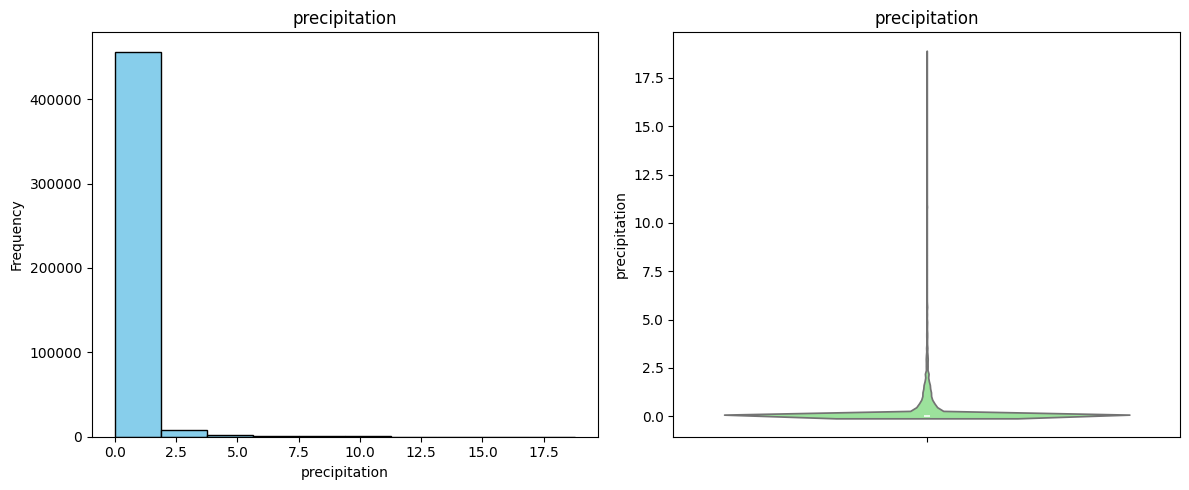

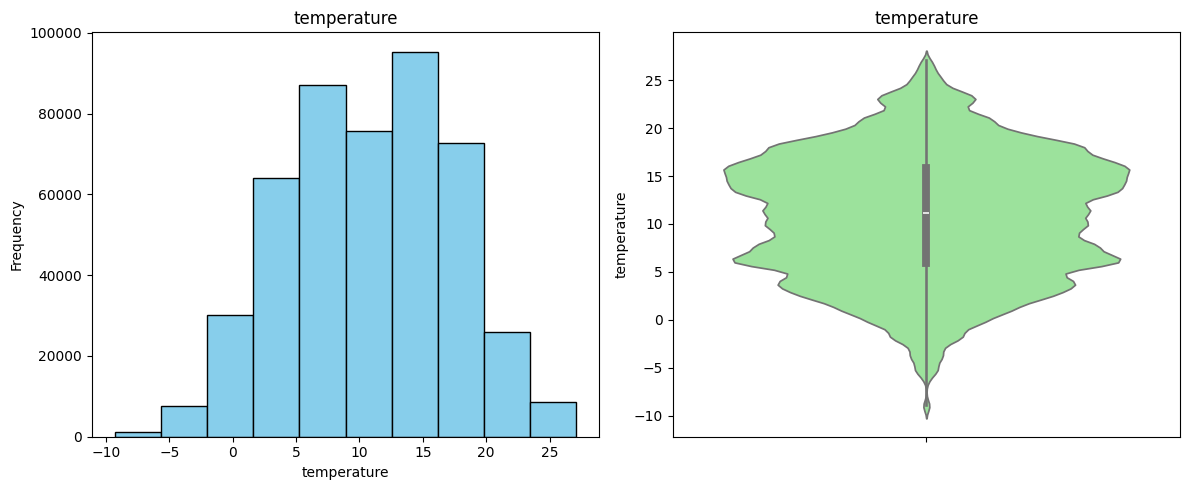

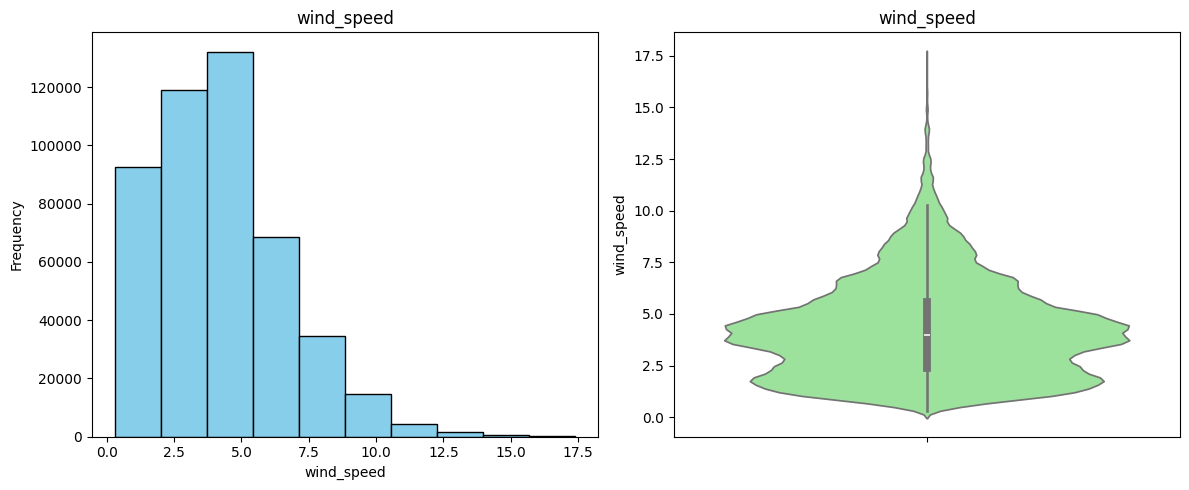

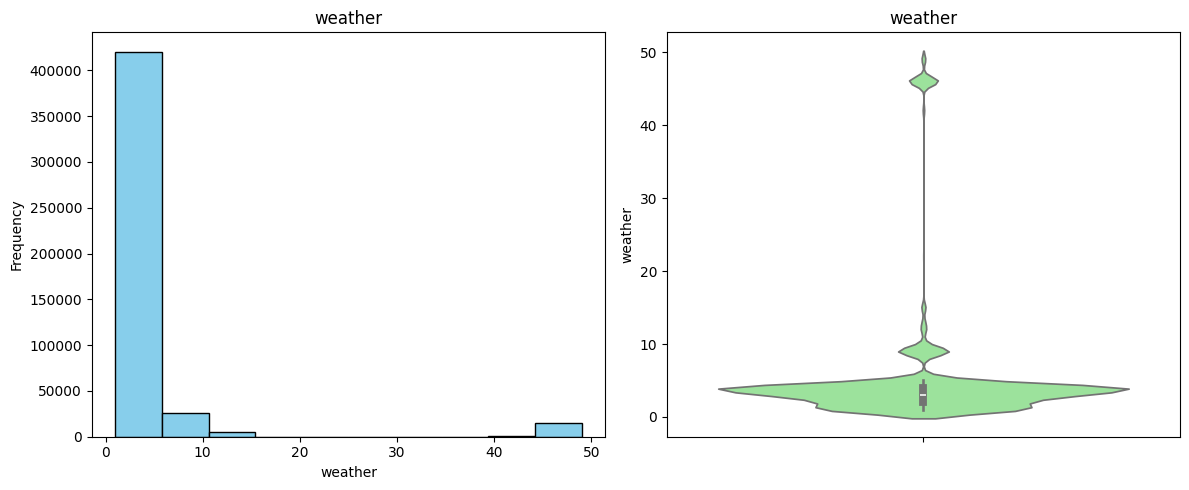

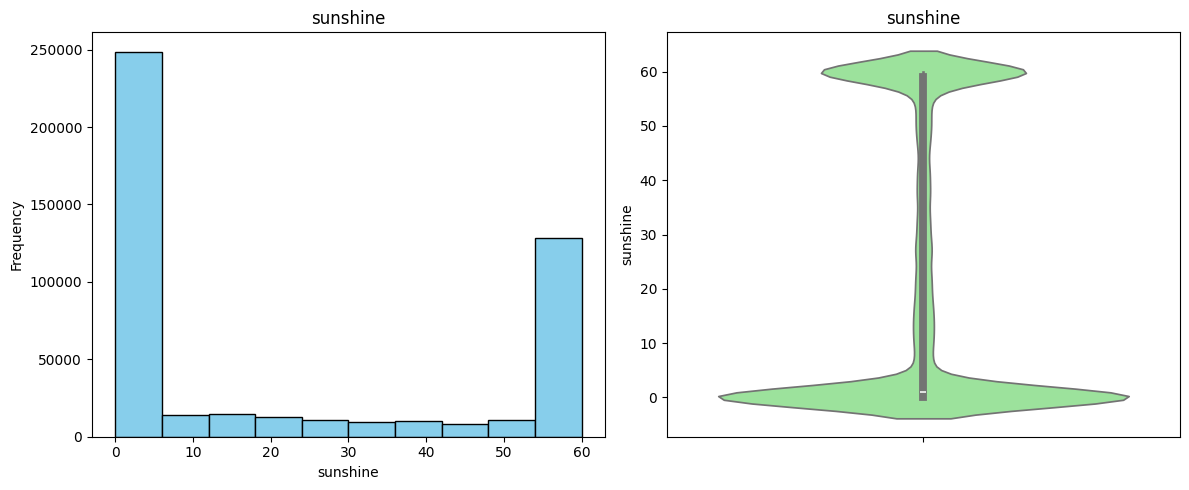

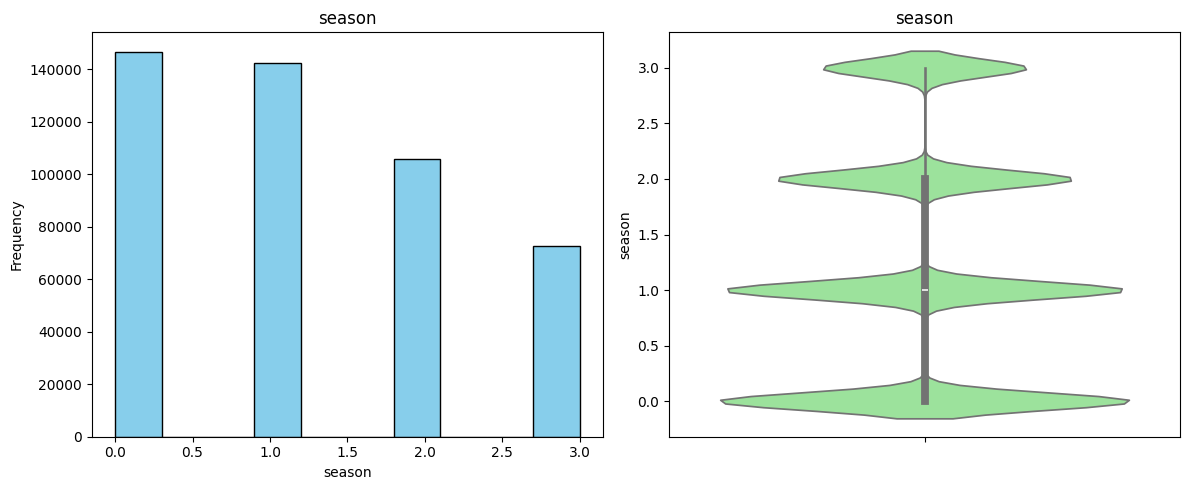

In [16]:
binary = ['is_holiday', 'is_weekend', 'is_sunny', 'is_rainy', 'is_cloudy', 'is_spring', 'is_summer',
          'is_fall', 'is_winter']

for column in trip_data.columns:
    if column not in binary:
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.hist(trip_data[column], bins=10, color='skyblue', edgecolor='black')
      plt.title(column)
      plt.xlabel(column)
      plt.ylabel('Frequency')

      plt.subplot(1, 2, 2)
      sns.violinplot(y=trip_data[column], color='lightgreen')
      plt.title(column)
      plt.ylabel(column)

      plt.tight_layout()
      plt.show()

Based on the distribution of the duration feature, we can see that it has values that are far from the majority of the data, which may indicate the presence of outliers. Similar observations can be made for the precipitation and wind_speed features. In the case of wind_speed, the values are not as far apart.

We also noticed an unusual distribution of the sunshine feature. It appears to have many values close to the minimum and many values close to the maximum.

### We decided to replace the coordinates, which by themselves do not seem to provide useful information, with the distance traveled during the trip and the elevation difference.

#### We extract the distance from the features start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude using the [Project-OSRM API](https://project-osrm.org/docs/v5.24.0/api/#). The distance is calculated only for unique combinations of start and end stations to speed up the process. This new feature will be used for further analysis. We remove records where the start and end stations are the same, as this may negatively impact the model's training.

In [17]:
trip_data = trip_data[(trip_data['start_station_latitude'] != trip_data['end_station_latitude']) &
        (trip_data['start_station_longitude'] != trip_data['end_station_longitude'])]

In [18]:
def calculate_distance(row):
    start_cords = (row['start_station_latitude'], row['start_station_longitude'])
    end_cords = (row['end_station_latitude'], row['end_station_longitude'])
    url = f"http://router.project-osrm.org/route/v1/bike/{start_cords[1]},{start_cords[0]};{end_cords[1]},{end_cords[0]}?overview=false"
    response = requests.get(url)
    data = response.json()

    try:
      distance = distance = data['routes'][0]['legs'][0]['distance']
    except:
      distance = 0

    return distance

unique_start_end_combinations = trip_data[['start_station_latitude', 'start_station_longitude',
                                           'end_station_latitude', 'end_station_longitude']].drop_duplicates()

unique_start_end_combinations['distance'] = unique_start_end_combinations.apply(calculate_distance, axis=1)

#### We extract the elevation difference from the features start_station_latitude, start_station_longitude, end_station_latitude, and end_station_longitude using the [Open-Mateo Elevation API](https://open-meteo.com/en/docs/elevation-api). The elevation difference is calculated based on the elevation for each station, and then we subtract the starting elevation from the ending elevation. The calculations will also be performed for unique combinations of start and end stations to speed up the process.

In [19]:
def get_elevation_levels(row):
    cords = (row['lat'], row['lon'])
    url = f"https://api.open-meteo.com/v1/elevation?latitude={cords[0]}&longitude={cords[1]}"
    response = requests.get(url)
    data = response.json()
    try:
      elevation = data['elevation']
    except:
      elevation = 0

    return elevation


start_locs = trip_data[['start_station_latitude', 'start_station_longitude']].rename(
                            columns={'start_station_latitude': 'lat', 'start_station_longitude': 'lon'})
end_locs = trip_data[['end_station_latitude', 'end_station_longitude']].rename(
                            columns={'end_station_latitude': 'lat', 'end_station_longitude': 'lon'})

all_pairs = pd.concat([start_locs, end_locs])

unique_pairs = all_pairs.drop_duplicates().copy()

unique_pairs['elevation'] = unique_pairs.apply(get_elevation_levels, axis=1)

In [20]:
def calculate_elevation(row):
    try:
      start_elevation = unique_pairs[(unique_pairs['lat'] == row['start_station_latitude'])
                                      & (unique_pairs['lon'] == row['start_station_longitude'])]['elevation'].values[0][0]
      end_elevation = unique_pairs[(unique_pairs['lat'] == row['end_station_latitude'])
                                      & (unique_pairs['lon'] == row['end_station_longitude'])]['elevation'].values[0][0]
      elevation = end_elevation - start_elevation
    except:
      elevation = 0

    return elevation

unique_start_end_combinations['elevation'] = unique_start_end_combinations.apply(calculate_elevation, axis=1)

#### Next, we merge the data for unique combinations with the entire dataset.

In [21]:
trip_data = trip_data.merge(unique_start_end_combinations[['start_station_latitude', 'start_station_longitude',
                                                          'end_station_latitude', 'end_station_longitude', 'distance', 'elevation']],
              on=['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'],
              how='left')

trip_data.head()

duration  start_station_latitude  start_station_longitude  \
0       629               60.395878                 5.325284   
1       643               60.393323                 5.330654   
2       227               60.388247                 5.324558   
3       254               60.396384                 5.324169   
4       476               60.375141                 5.338517   

   end_station_latitude  end_station_longitude  precipitation  temperature  \
0             60.398865               5.306411            0.0         -1.8   
1             60.402229               5.320745            0.0         -1.8   
2             60.396384               5.324169            0.0         -1.9   
3             60.401906               5.324748            0.0         -1.9   
4             60.383934               5.333450            0.0          0.6   

   wind_speed  weather  sunshine  season  is_holiday  is_weekend  distance  \
0         1.7        1         0       3        True        True    1611.8   
1         1.7        1         0       3        True        True    1887.7   
2         4.3        1         0       3        True        True    1626.7   
3         4.3        1         0       3        True        True    1084.5   
4         5.1        1         0       3        True        True    1114.2   

   elevation  
0       24.0  
1      -14.0  
2      -22.0  
3       25.0  
4       -5.0

In [ ]:
trip_data.drop(columns=['start_station_latitude', 'start_station_longitude',
                        'end_station_latitude', 'end_station_longitude'], inplace=True)

### Analyzing the Variability of the Newly Created Features

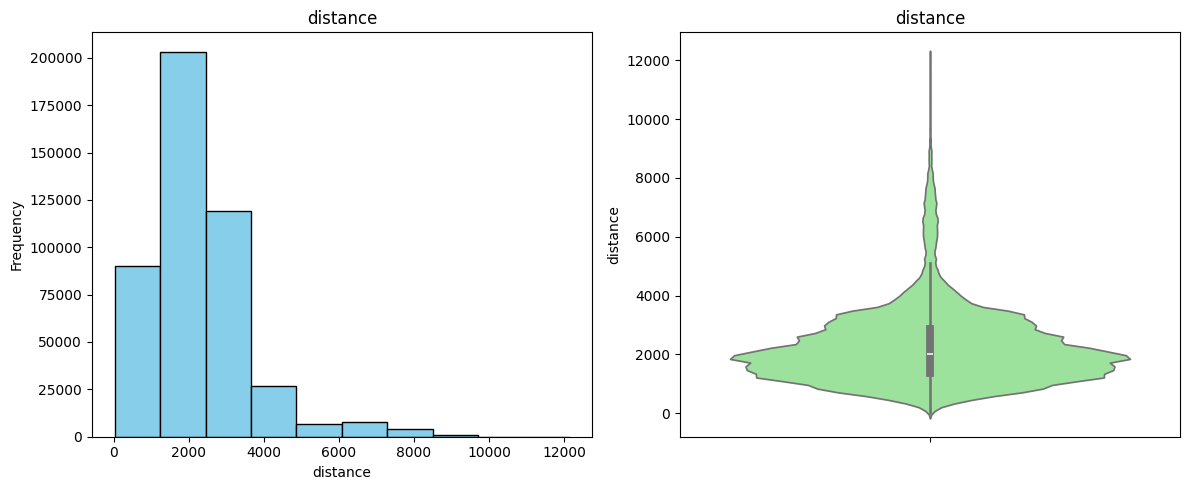

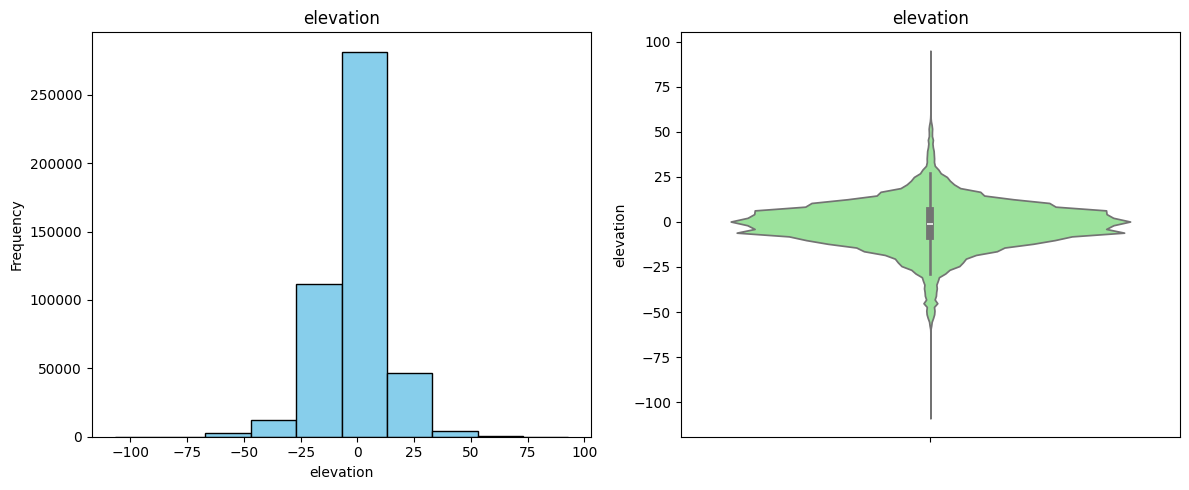

In [27]:
for column in ['distance', 'elevation']:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(trip_data[column], bins=10, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    sns.violinplot(y=trip_data[column], color='lightgreen')
    plt.title(column)
    plt.ylabel(column)

    plt.tight_layout()
    plt.show()

We can see that both features have outliers, which we will remove in the following steps.

### From the categorical weather feature (https://nrkno.github.io/yr-weather-symbols/), we extract 3 general features: is_sunny, is_rainy, and is_cloudy.

In [28]:
trip_data['is_sunny'] = trip_data['weather'].isin([1, 2]).astype(int)
trip_data['is_cloudy'] = trip_data['weather'].isin([3, 4, 15]).astype(int)
trip_data['is_rainy'] = (~trip_data['weather'].isin([1, 2, 3, 4, 15])).astype(int)

trip_data.drop(columns=['weather'], inplace=True)
trip_data.head()

duration  precipitation  temperature  wind_speed  sunshine  season  \
0       629            0.0         -1.8         1.7         0       3   
1       643            0.0         -1.8         1.7         0       3   
2       227            0.0         -1.9         4.3         0       3   
3       254            0.0         -1.9         4.3         0       3   
4       476            0.0          0.6         5.1         0       3   

   is_holiday  is_weekend  distance  elevation  is_sunny  is_cloudy  is_rainy  
0        True        True    1611.8       24.0         1          0         0  
1        True        True    1887.7      -14.0         1          0         0  
2        True        True    1626.7      -22.0         1          0         0  
3        True        True    1084.5       25.0         1          0         0  
4        True        True    1114.2       -5.0         1          0         0

### We split the season feature into 4 binary features: is_spring, is_summer, is_fall, and is_winter.

In [29]:
trip_data['is_spring'] = (trip_data['season'] == 0).astype(int)
trip_data['is_summer'] = (trip_data['season'] == 1).astype(int)
trip_data['is_fall'] = (trip_data['season'] == 2).astype(int)
trip_data['is_winter'] = (trip_data['season'] == 3).astype(int)

trip_data.drop(columns=['season'], inplace=True)
trip_data.head()

duration  precipitation  temperature  wind_speed  sunshine  is_holiday  \
0       629            0.0         -1.8         1.7         0        True   
1       643            0.0         -1.8         1.7         0        True   
2       227            0.0         -1.9         4.3         0        True   
3       254            0.0         -1.9         4.3         0        True   
4       476            0.0          0.6         5.1         0        True   

   is_weekend  distance  elevation  is_sunny  is_cloudy  is_rainy  is_spring  \
0        True    1611.8       24.0         1          0         0          0   
1        True    1887.7      -14.0         1          0         0          0   
2        True    1626.7      -22.0         1          0         0          0   
3        True    1084.5       25.0         1          0         0          0   
4        True    1114.2       -5.0         1          0         0          0   

   is_summer  is_fall  is_winter  
0          0        0          1  
1          0        0          1  
2          0        0          1  
3          0        0          1  
4          0        0          1

### Analyzing the Variability of Binary Features

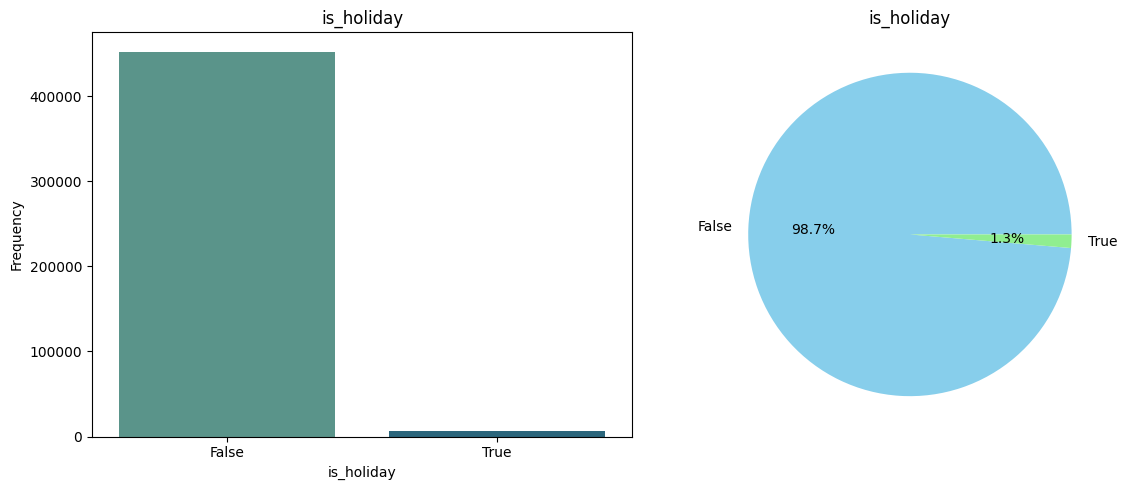

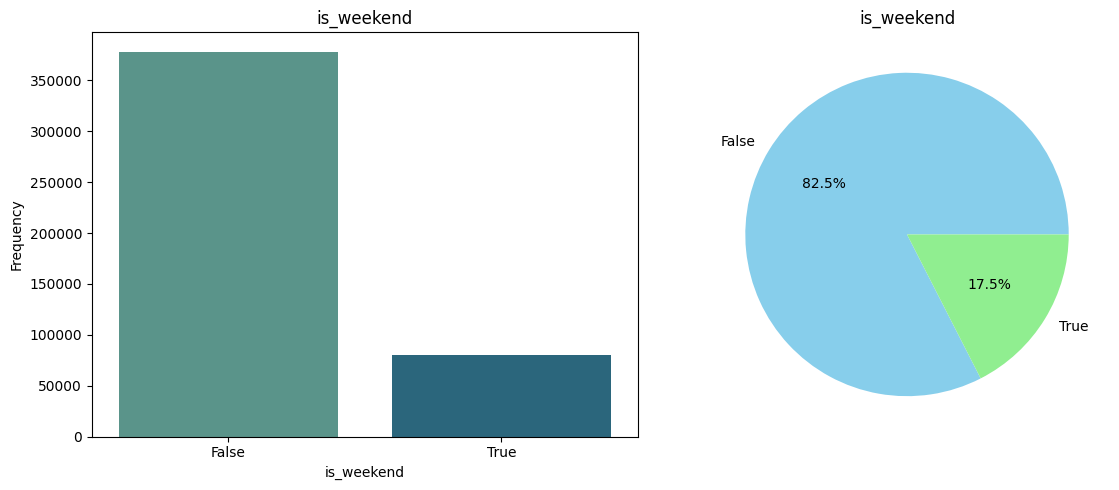

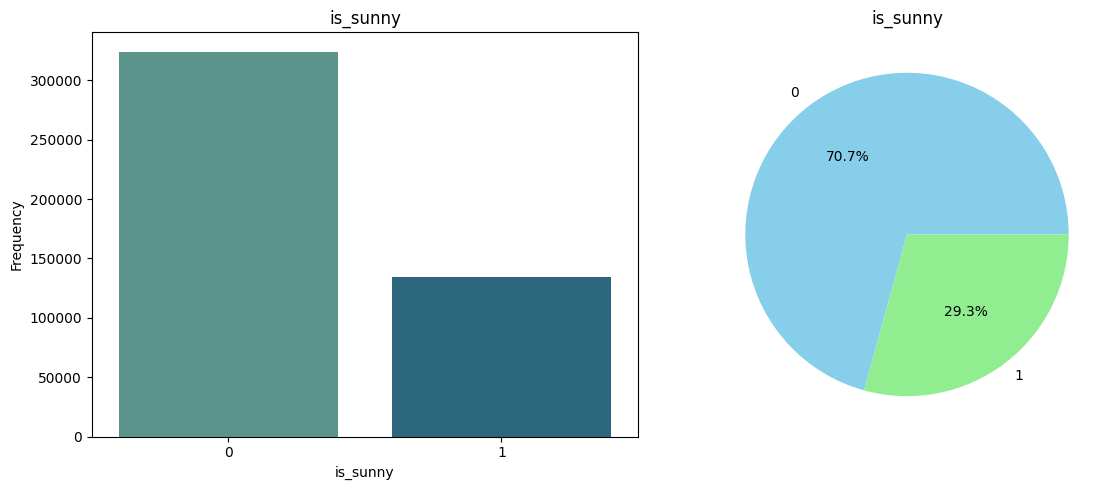

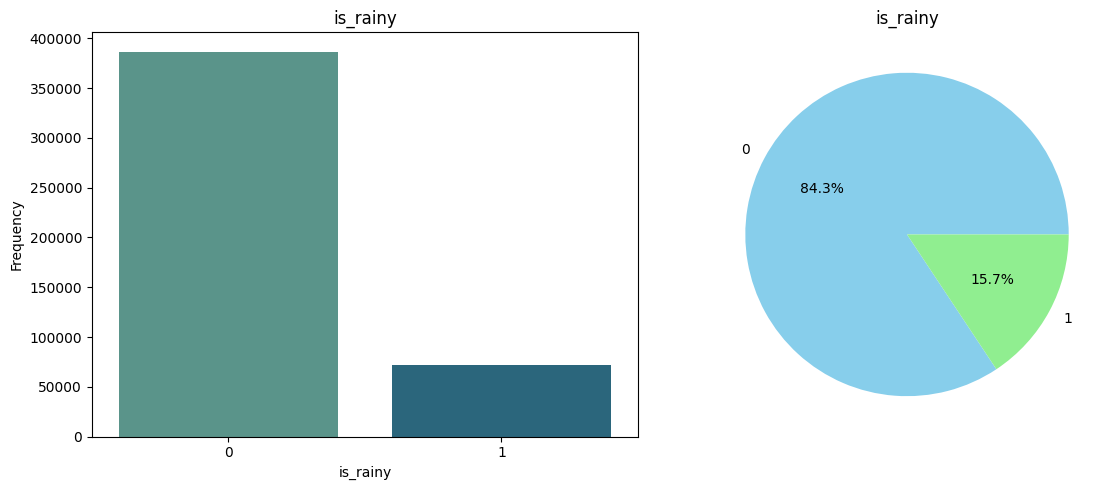

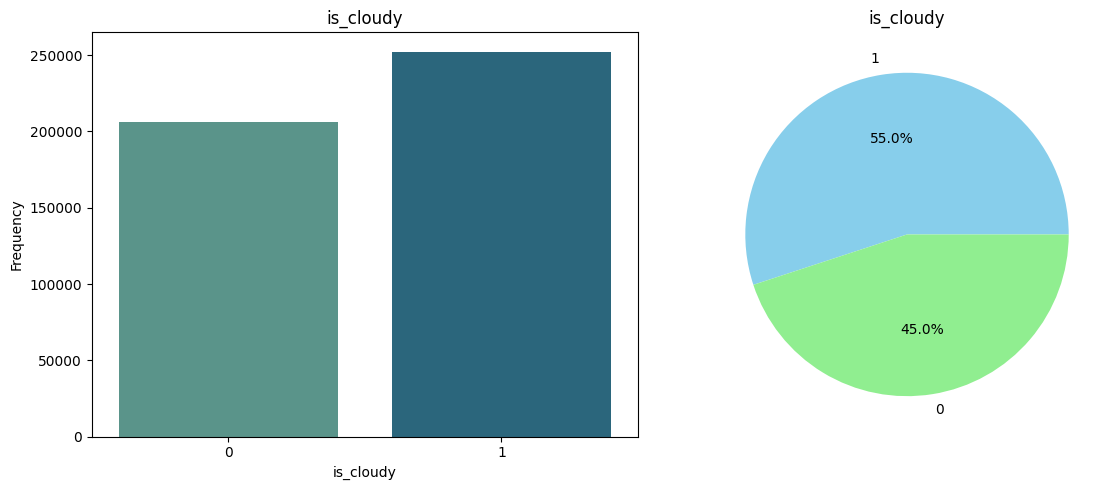

In [30]:
for column in binary:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    counts = trip_data[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='crest', legend=False)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
    plt.title(column)
    plt.ylabel('')

    plt.tight_layout()
    plt.show()

We can see that there are few holiday trips in the dataset, and there are slightly fewer trips on weekends compared to weekdays, which may indicate that trips are evenly distributed across the days of the week. We also observe that the most trips took place during cloudy weather. The trips are fairly evenly distributed across the seasons, although there is the least data from the winter season.

### Analyzing Correlations Between Features Before Removing Outliers

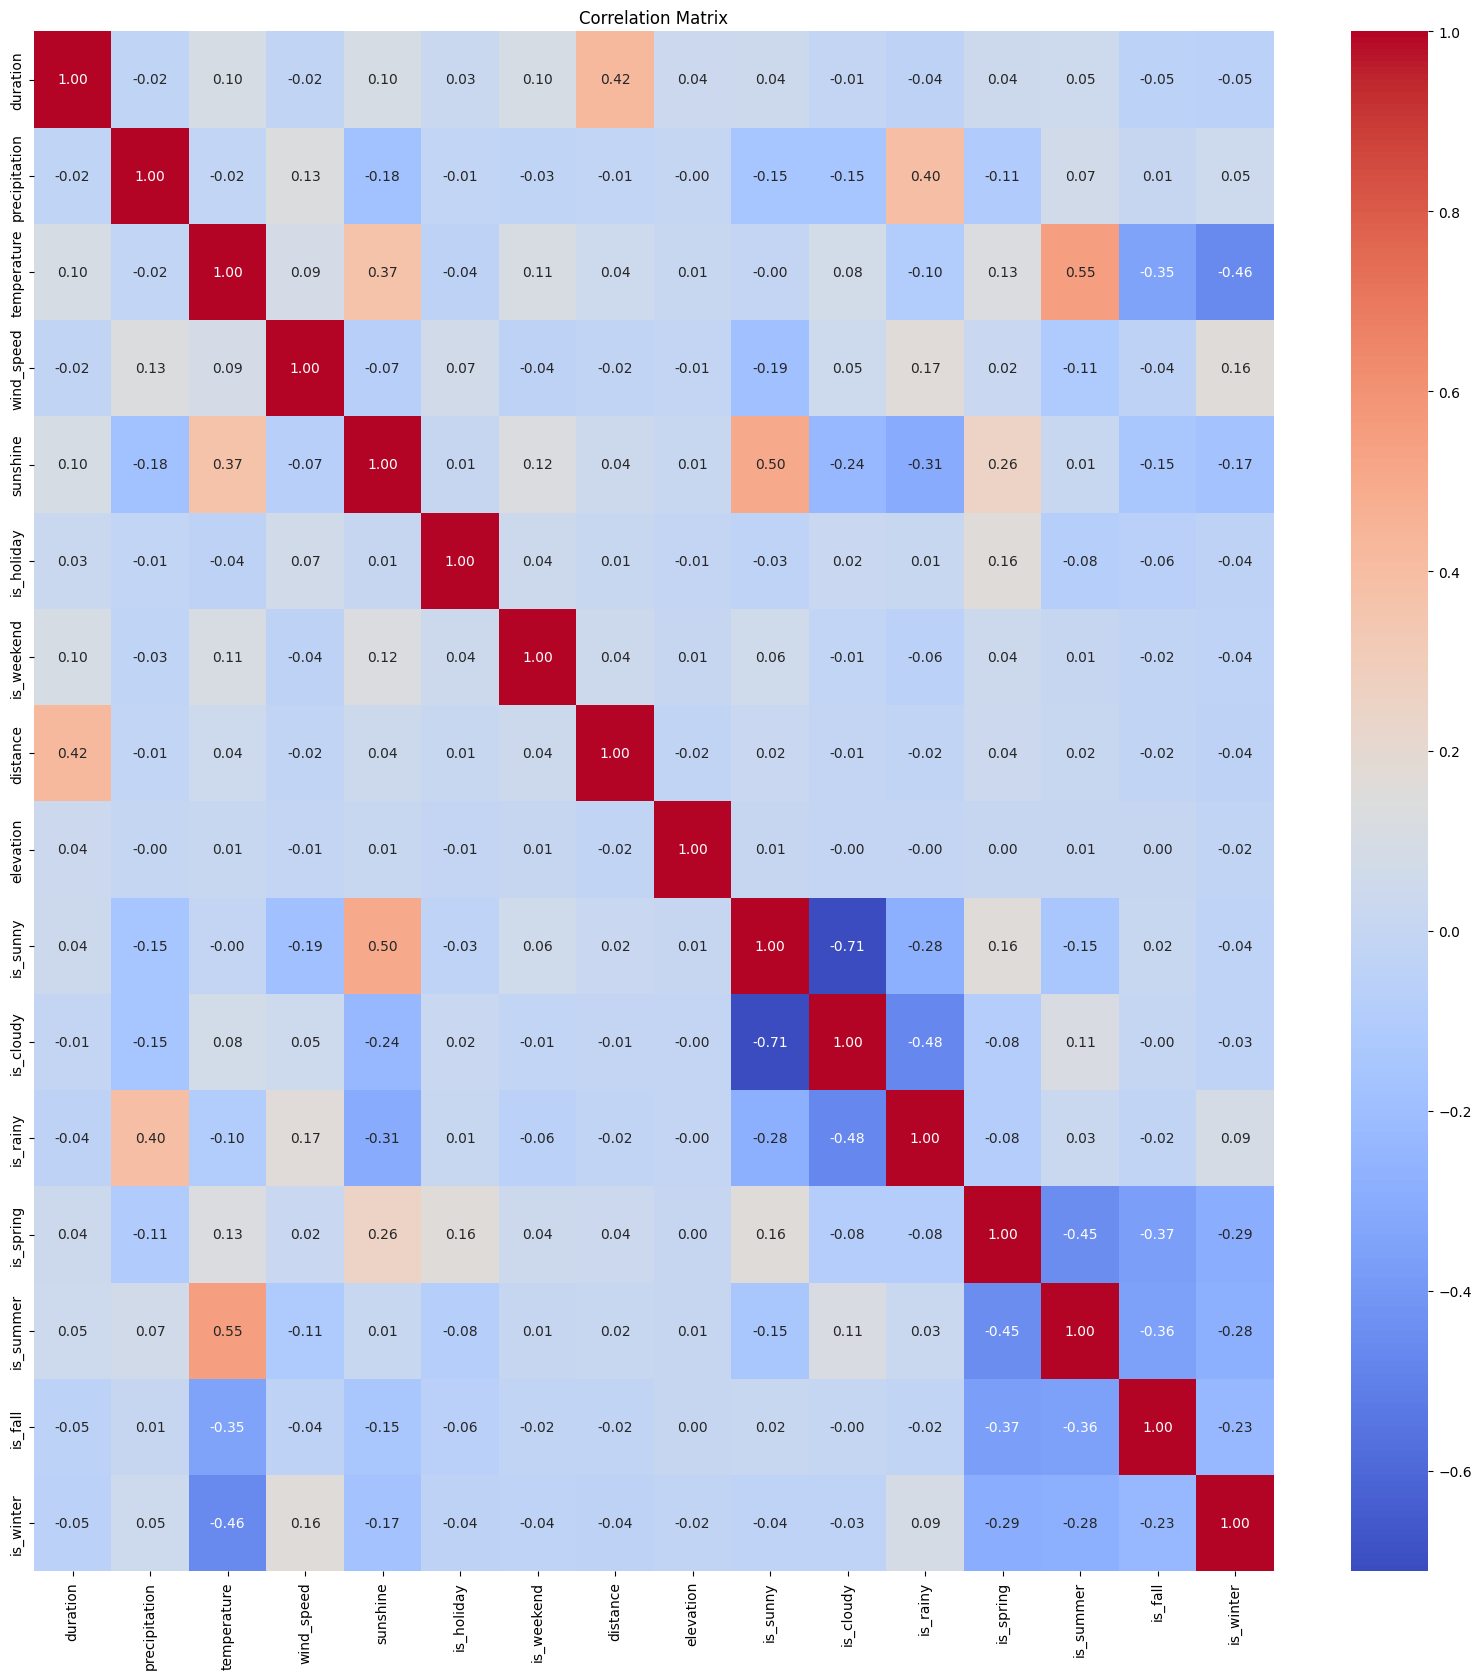

In [31]:
corr = trip_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We can see that the highest correlation with the duration feature is for the distance feature. The other features don't show a strong correlation with duration, but we can highlight temperature, sunshine, and is_weekend, which have a correlation value of 0.10, slightly higher than the other features. This indicates that the primary feature influencing the trip duration will be the distance traveled.

From the correlation matrix, we noticed several relationships between features:

- There is a strong negative correlation between is_cloudy and is_sunny.
- Weather-related features such as temperature, wind_speed, and sunshine are largely dependent on the season.
- Sunshine is dependent on the prevailing weather conditions.

We can also observe significant negative correlations between mutually exclusive features.

#### We will remove the outliers of features based on the 1.5 times the interquartile range rule. To do this, we will use a function to calculate the lower and upper boundaries for outlier values for a given feature. The previous analysis of the precipitation feature showed that a large portion of the values is 0, so we decided that for this feature, outliers should be removed using the method of mean ± 3 * standard deviation.

In [32]:
def calculate_iqr_bounds(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1

    low_boundary = (q1 - 1.5 * iqr)
    upp_boundary = (q3 + 1.5 * iqr)

    return low_boundary, upp_boundary

#### For the features from which we want to remove outliers, we calculate the lower and upper boundaries.

In [33]:
duration_lower_bound, duration_upper_bound = calculate_iqr_bounds(trip_data['duration'])

precipitation_mean = trip_data['precipitation'].mean()
precipitation_std = trip_data['precipitation'].std()
precipitation_lower_bound = precipitation_mean - 3 * precipitation_std
precipitation_upper_bound = precipitation_mean + 3 * precipitation_std

wind_speed_lower_bound, wind_speed_upper_bound = calculate_iqr_bounds(trip_data['wind_speed'])
distance_lower_bound, distance_upper_bound = calculate_iqr_bounds(trip_data['distance'])
elevation_lower_bound, elevation_upper_bound = calculate_iqr_bounds(trip_data['elevation'])

#### We remove the outliers.

In [34]:
trip_data = trip_data[(trip_data['duration'] >= duration_lower_bound) & (trip_data['duration'] <= duration_upper_bound)]
trip_data = trip_data[(trip_data['precipitation'] >= precipitation_lower_bound) & (trip_data['precipitation'] <= precipitation_upper_bound)]
trip_data = trip_data[(trip_data['wind_speed'] >= wind_speed_lower_bound) & (trip_data['wind_speed'] <= wind_speed_upper_bound)]
trip_data = trip_data[(trip_data['distance'] >= distance_lower_bound) & (trip_data['distance'] <= distance_upper_bound)]
trip_data = trip_data[(trip_data['elevation'] >= elevation_lower_bound) & (trip_data['elevation'] <= elevation_upper_bound)]

### Analyzing the Variability of Features After Transformations on the Dataset

#### Variability of Non-Binary Features

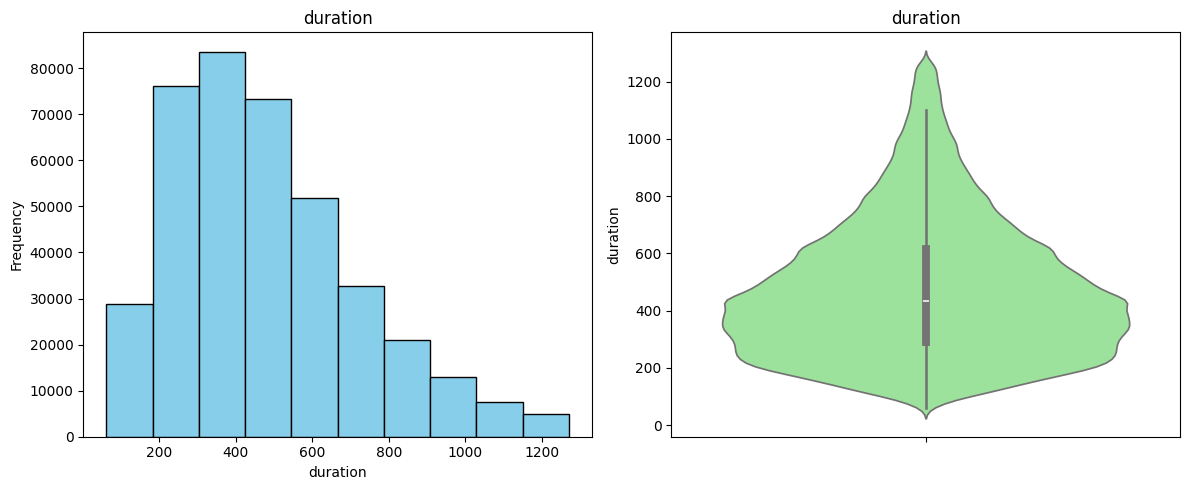

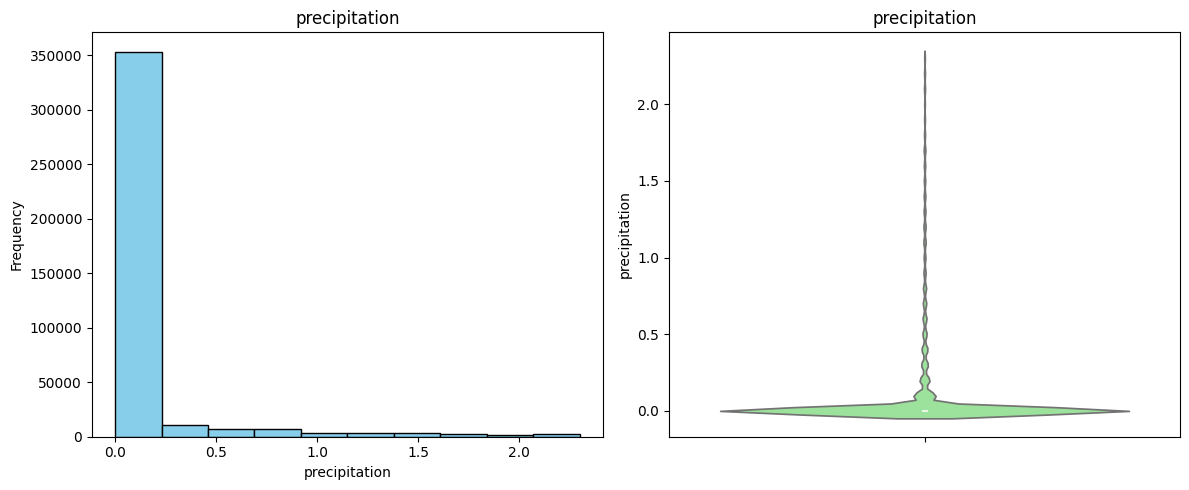

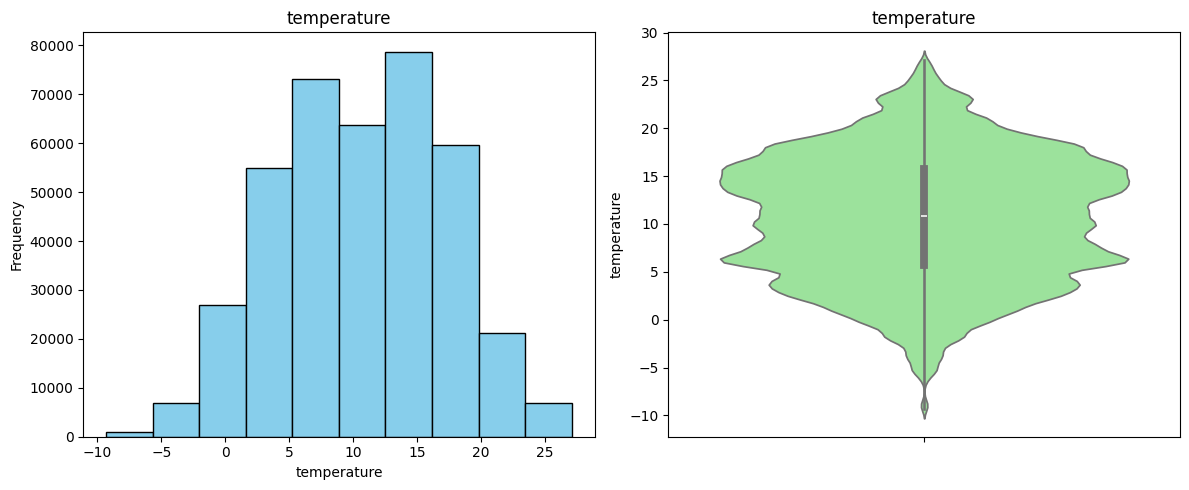

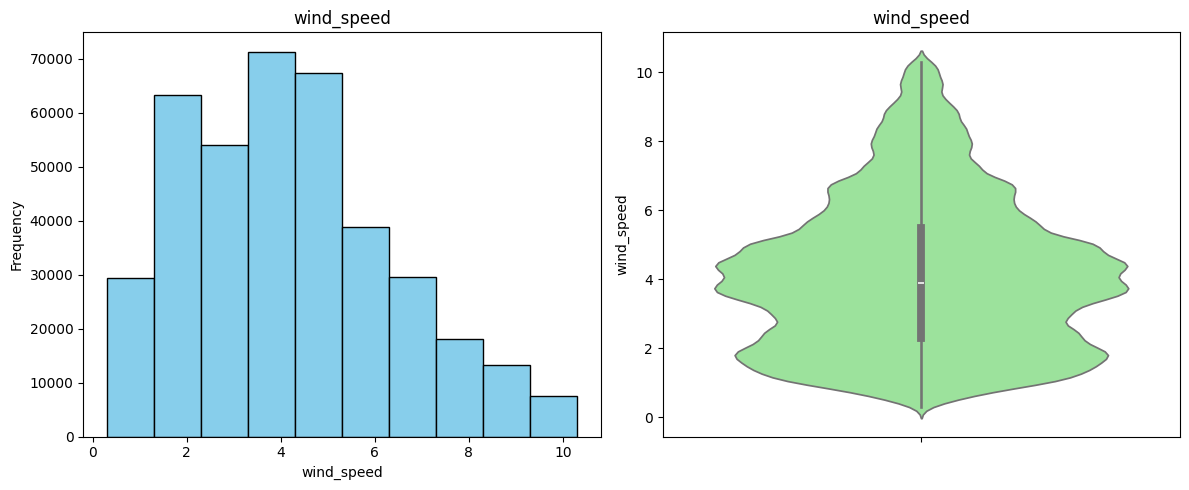

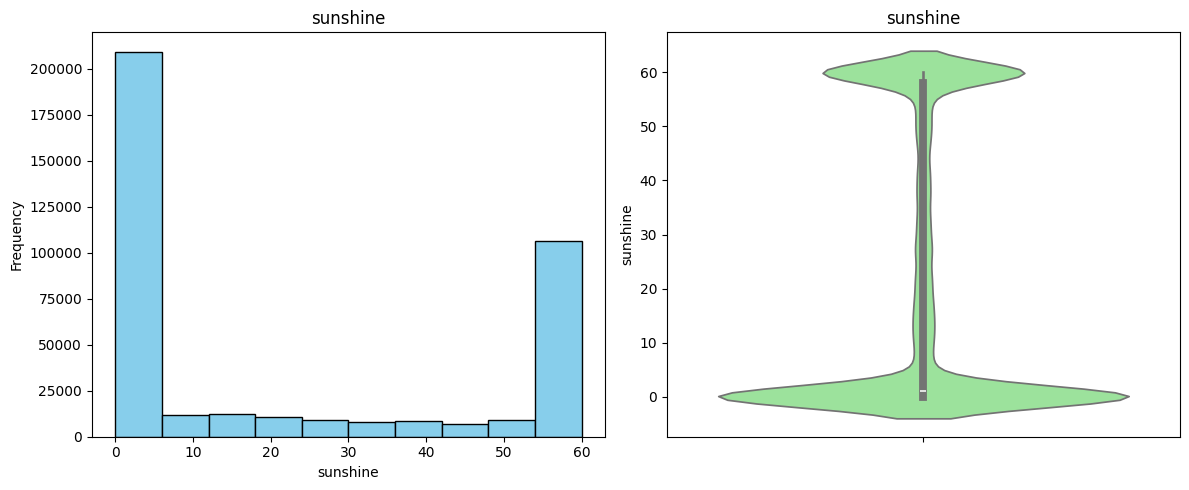

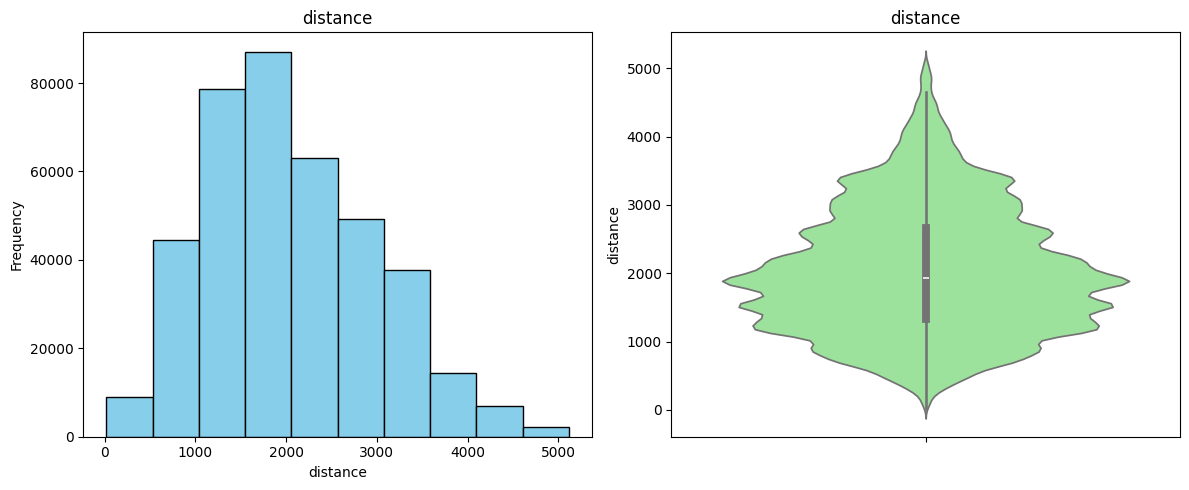

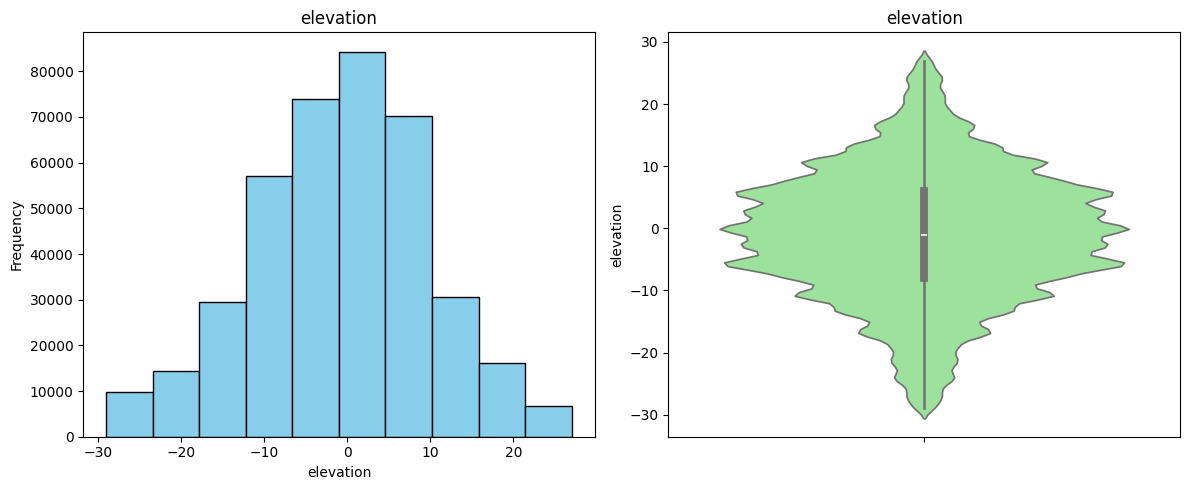

In [35]:
for column in trip_data.columns:
    if column not in binary:
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.hist(trip_data[column], bins=10, color='skyblue', edgecolor='black')
      plt.title(column)
      plt.xlabel(column)
      plt.ylabel('Frequency')

      plt.subplot(1, 2, 2)
      sns.violinplot(y=trip_data[column], color='lightgreen')
      plt.title(column)
      plt.ylabel(column)

      plt.tight_layout()
      plt.show()

Based on the charts, we can observe that the features have better distributions after removing the outliers. We also see that the precipitation feature still has a dominance of small values, but removing more outliers could lead to the loss of information conveyed by this feature.

### Analyzing the Dependencies Between Features After Removing Outliers

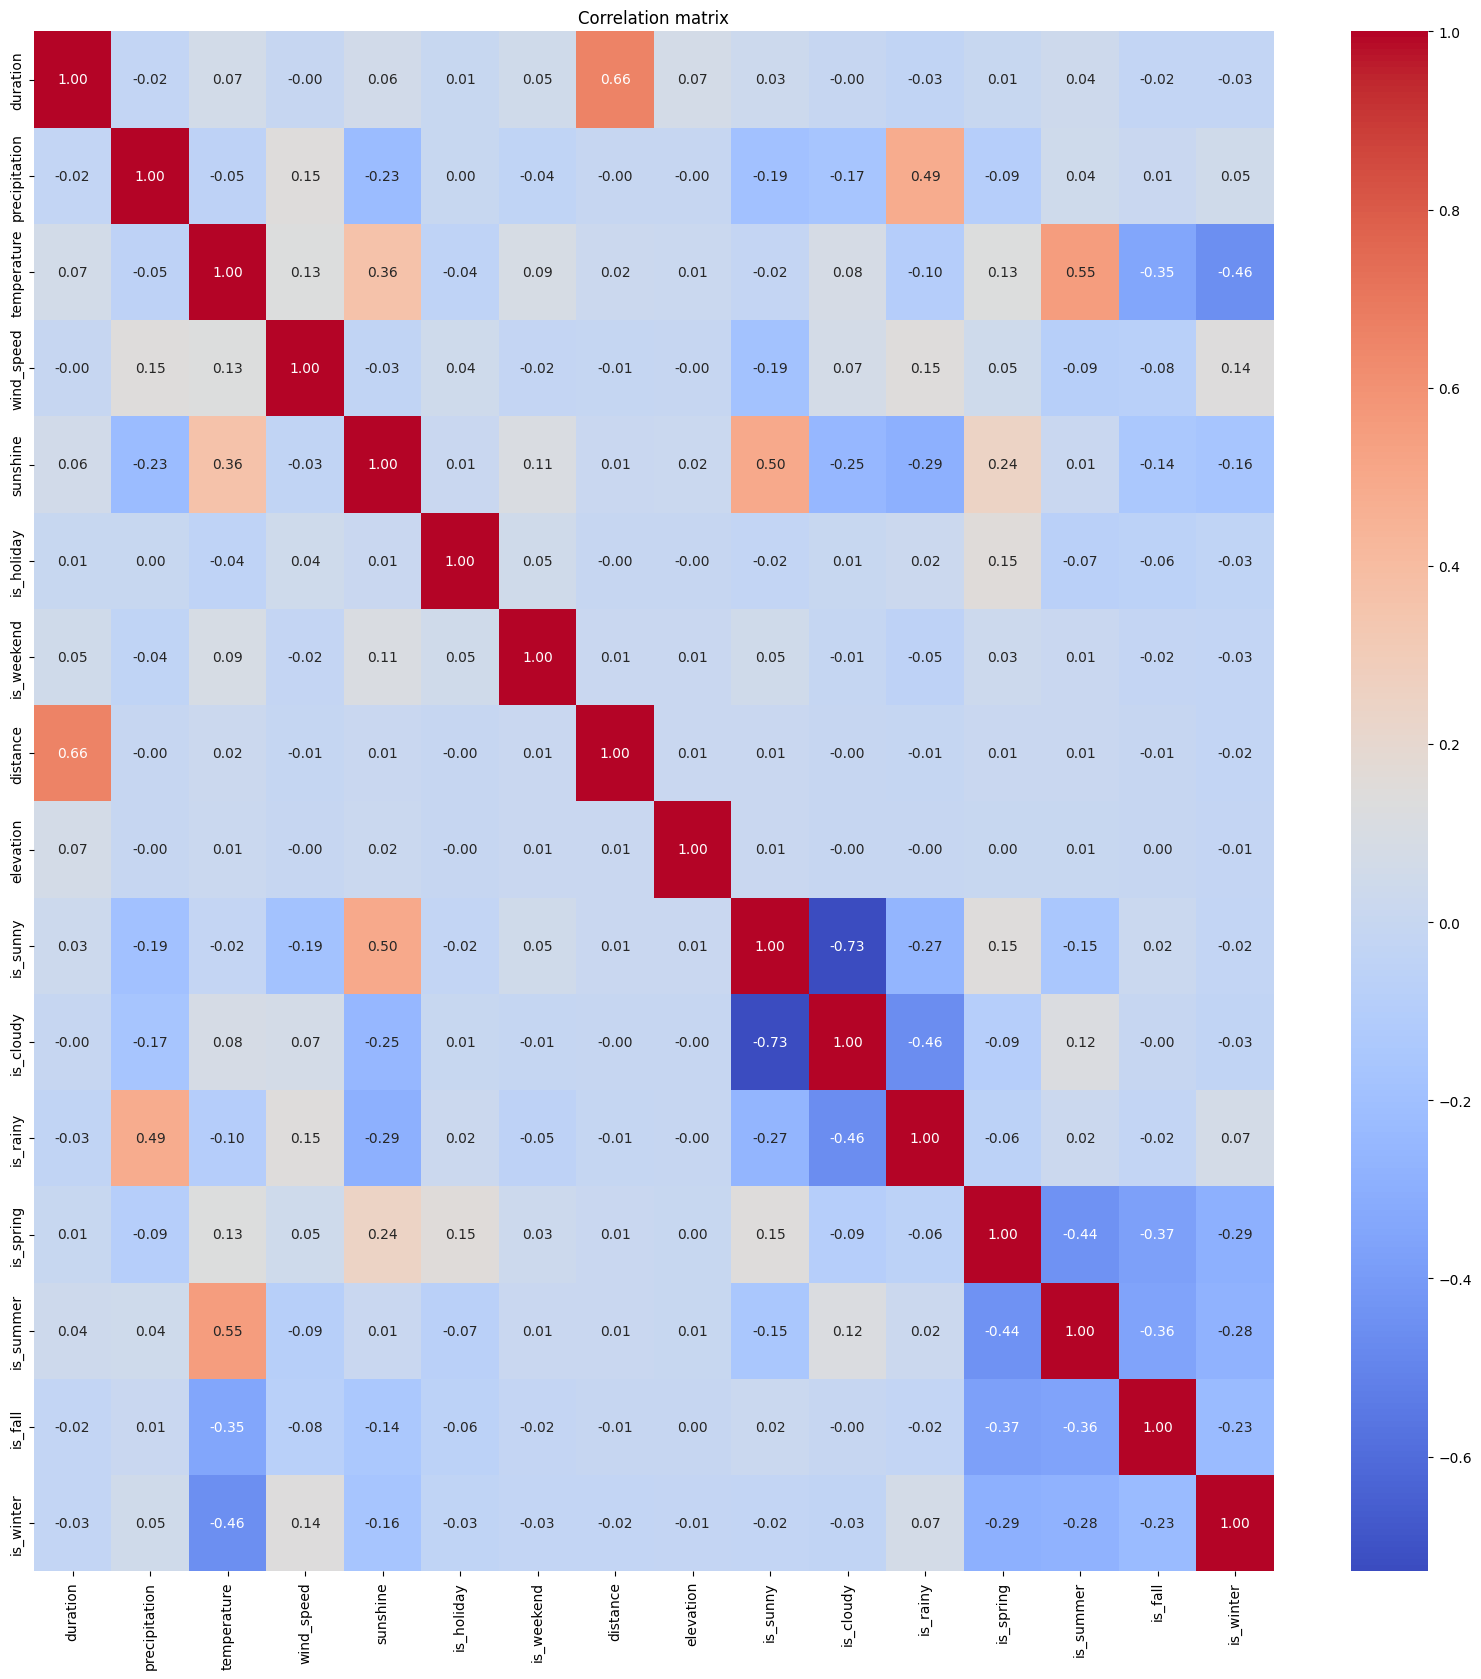

In [36]:
corr = trip_data.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

We can observe that the influence of distance on the duration feature has increased, while the influence of the other features has slightly decreased.

### We decided to check the correlogram to see if there are any previously unnoticed dependencies between non-binary features.

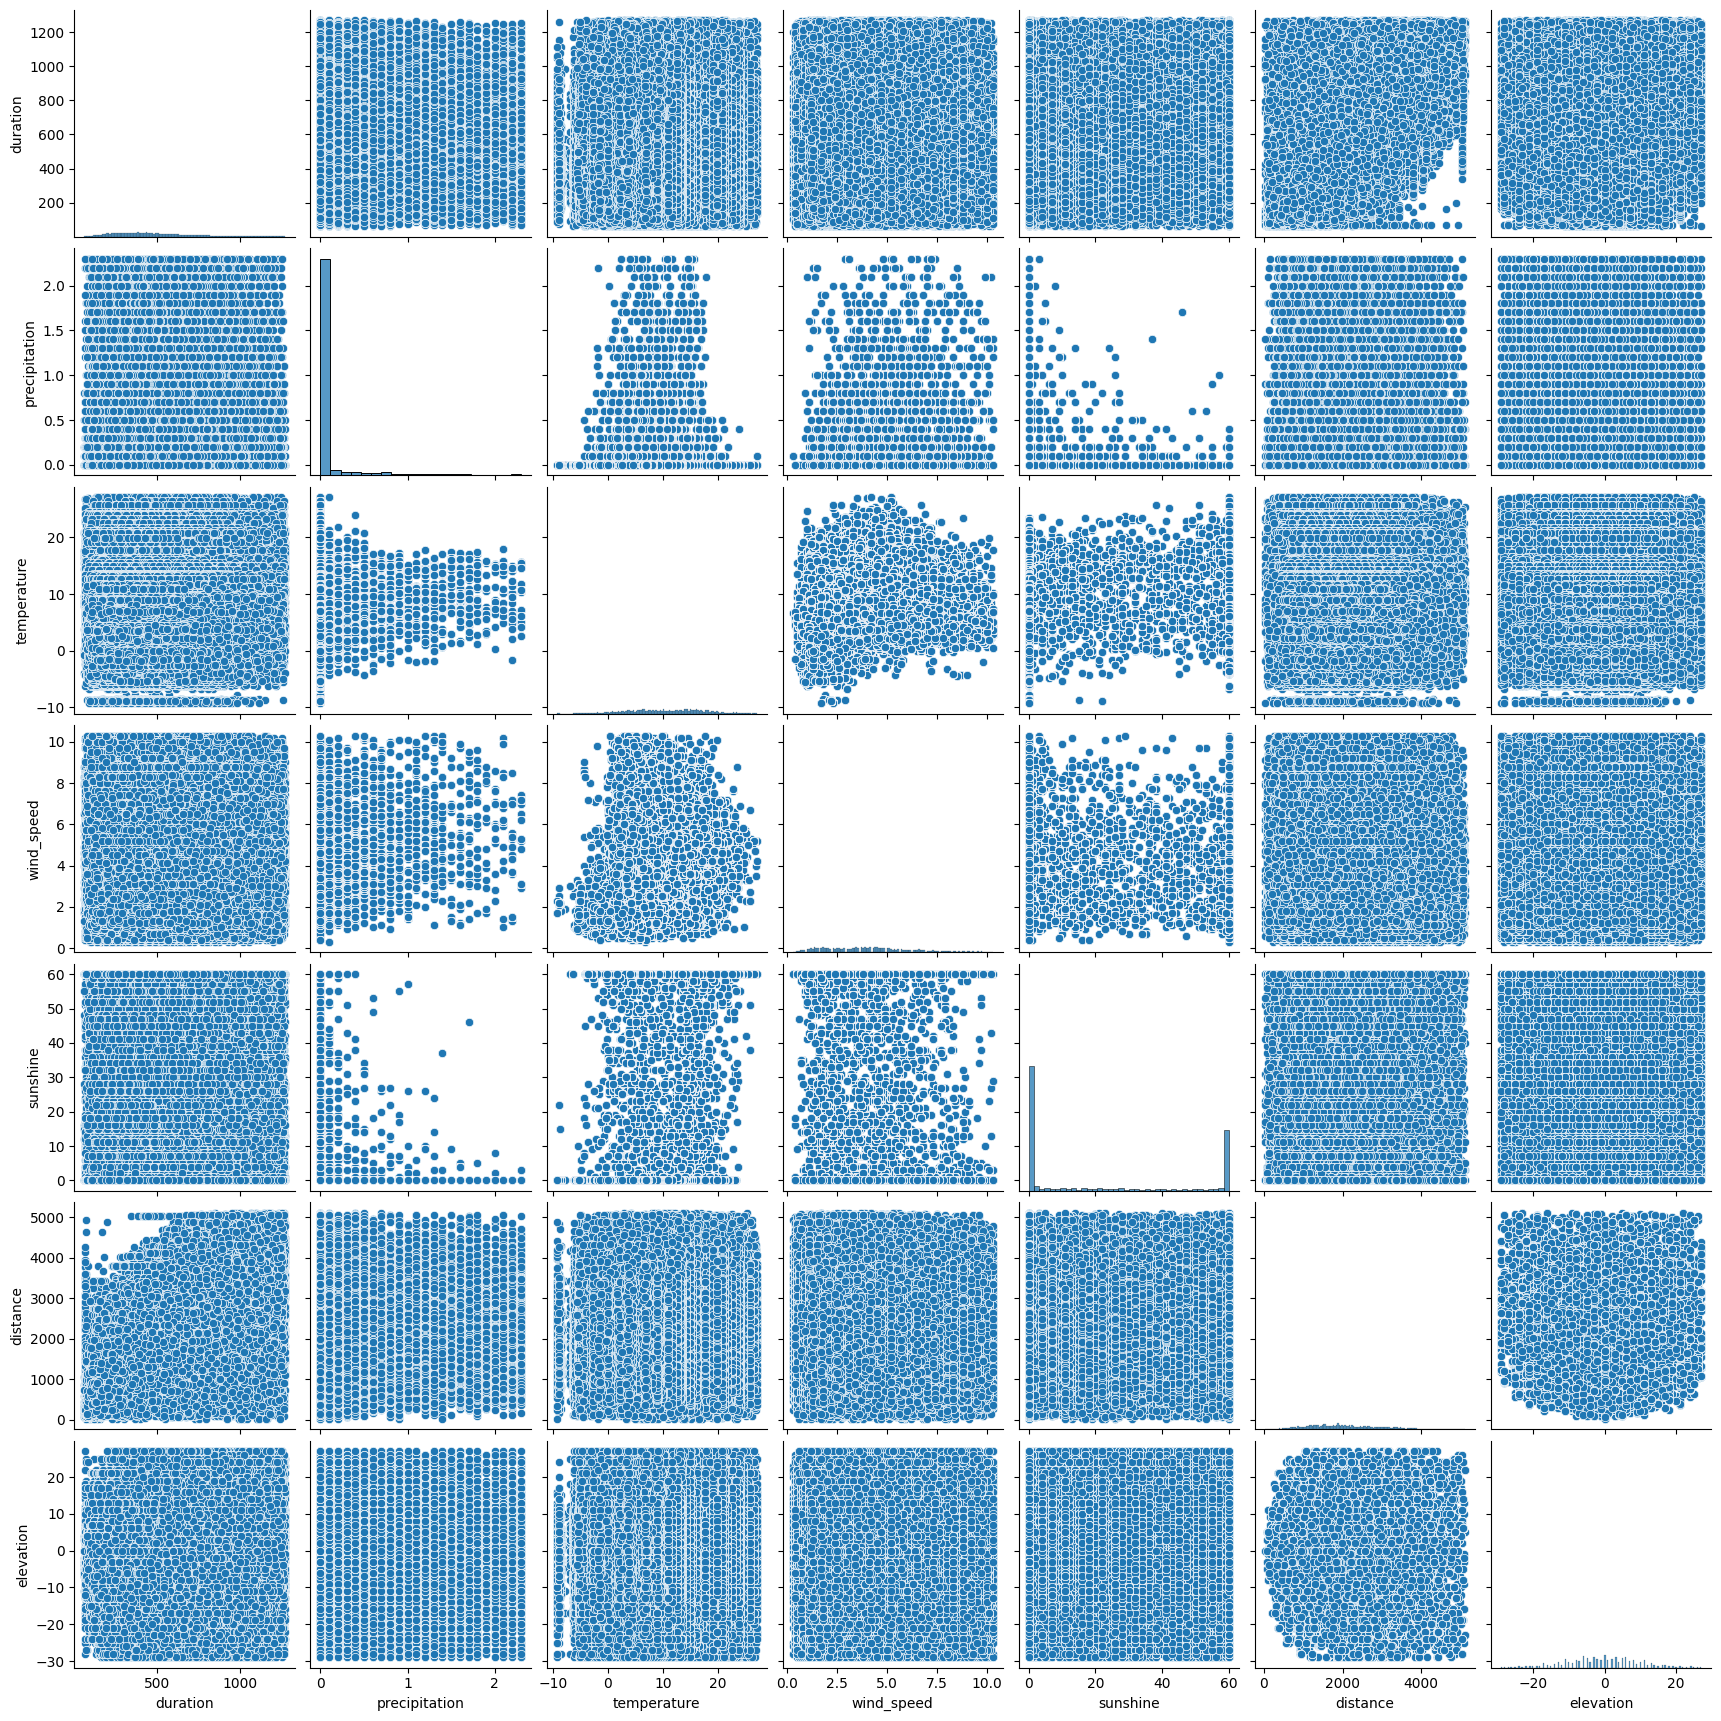

In [37]:
sns.pairplot(trip_data[['duration', 'precipitation', 'temperature', 'wind_speed', 'sunshine', 'distance', 'elevation']])

We can observe that long trips occur for both large and small distances, but short trips mostly occur for small distances. A similar pattern is seen with the elevation feature—there are fewer short trips for large elevation differences. We also notice that for high values of wind_speed, there are fewer long trips. A similar relationship is observed for the precipitation feature.

### Saving the Data to a File.

In [38]:
trip_data.to_csv('trip_data_cleaned.csv')

### Final Conclusions:
- After analyzing the dataset, we can conclude that weather conditions have a small impact on the duration of the bike trip, but they may influence whether someone will go on a bike trip. This can be evidenced by, for example, the smaller number of data points in the winter or the lower number of data points during heavy precipitation.
- Whether a day is a holiday has virtually no impact on the length of the trip.
- On weekends, the situation is similar, but we can observe that a small portion of trips are longer on those days.

### Based on the analysis of the dataset, we can formulate the hypothesis: The main factor influencing the duration of the trip is the distance traveled.

#### In the next notebook, we will attempt to create a model for predicting the duration of a bike trip based on the features we have analyzed.